# 202131148_Alexandro Nesta

# Deteksi Plat Nomor

In [4]:
#Import Library
import cv2
import matplotlib.pyplot as plt

In [5]:
# Fungsi untuk menampilkan gambar menggunakan Matplotlib
def show_image(title, image, position):
    plt.subplot(2, 2, position)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('on')

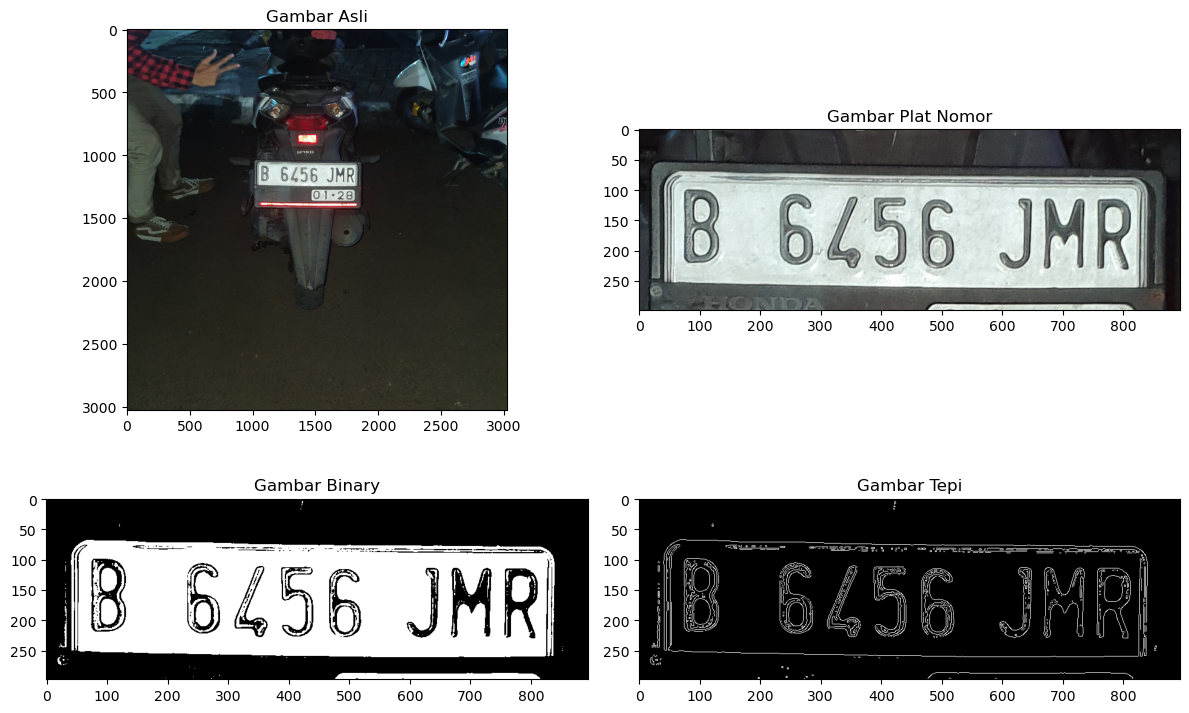

In [8]:
# Membaca gambar asli
image = cv2.imread('PlatMotor1.jpg')

# Mengubah gambar menjadi ke skala abu-abu
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan CascadeClassifier untuk mendeteksi wajah pada gambar
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
plates = classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Jika plat nomor terdeteksi
if len(plates) > 0:
    # Mengambil koordinat dari area plat nomor
    (x, y, w, h) = plates[0]
    
    # Crop area plat nomor
    plate_image = image[y:y+h, x:x+w]
    
    # Konversi ke skala abu-abu
    gray_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    
    # Thresholding gambar plat nomor menjadi biner
    _, binary_plate = cv2.threshold(gray_plate, 127, 255, cv2.THRESH_BINARY)
    
    # Mendeteksi tepi pada gambar plat nomor
    edges = cv2.Canny(binary_plate, 100, 200)
    
    # Menampilkan gambar-gambar hasil dengan susunan 2x2
    plt.figure(figsize=(12, 8))
    
    show_image('Gambar Asli', image, 1)
    show_image('Gambar Plat Nomor', plate_image, 2)
    show_image('Gambar Binary', binary_plate, 3)
    show_image('Gambar Tepi', edges, 4)
    
    plt.tight_layout()
    plt.show()
else:
    print("Plat nomor tidak terdeteksi pada gambar.")